In [3]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

## Building a PCA Model

In [56]:
bc = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/BreastCancer.csv")

In [57]:
print(bc.columns)
bc.head()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [58]:
features = bc.columns[2:32] #grab all numeric columns of interest
bc.drop("Unnamed: 32",axis = 1)
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [59]:
z = StandardScaler()
bc[features] = z.fit_transform(bc[features])

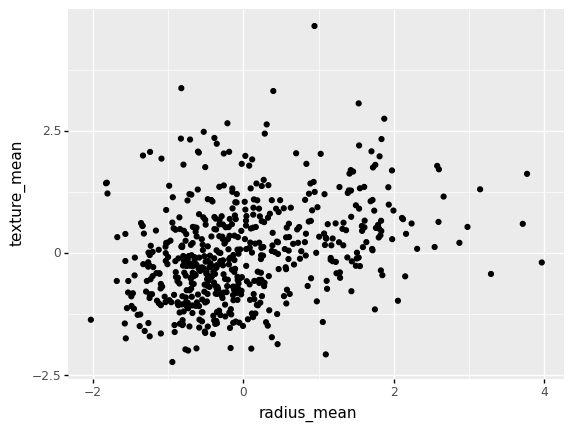

<ggplot: (8792454999715)>

In [60]:
(ggplot(bc, aes(x = "radius_mean", y = "texture_mean")) + geom_point())

In [61]:
pca = PCA()
pca.fit(bc[features])

PCA()

In [62]:
pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,31),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})
pcaDF

,expl_var,pc,cum_var
0,0.442720,1,0.442720
1,0.189712,2,0.632432
2,0.093932,3,0.726364
3,0.066021,4,0.792385
4,0.054958,5,0.847343
5,0.040245,6,0.887588
6,0.022507,7,0.910095
7,0.015887,8,0.925983
8,0.013896,9,0.939879
9,0.011690,10,0.951569


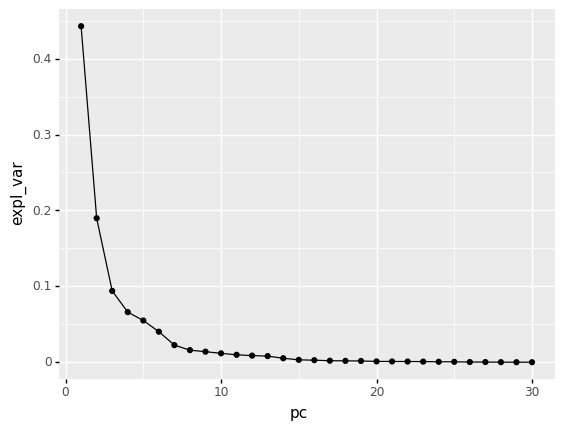

<ggplot: (8792455066007)>

In [63]:
# The scree plot

(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

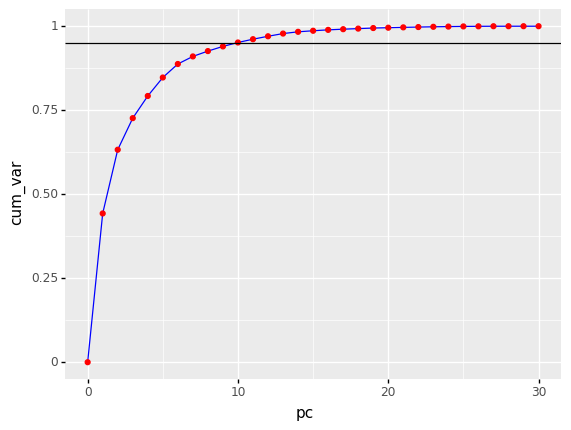

<ggplot: (8792455580666)>

In [64]:
pcaDF = pcaDF.append({'expl_var':0, 'pc':0, 'cum_var':0}, ignore_index=True)
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "blue") +
 geom_point(color = "red") + geom_hline(yintercept = 0.95))

In [65]:
pcomps4 = pca.transform(bc[features])
pcomps4 = pd.DataFrame(pcomps4[:,0:4])

pcomps10 = pca.transform(bc[features])
pcomps10 = pd.DataFrame(pcomps10[:, 0:10])

#modeMod1
lr1 = LogisticRegression()
lr1.fit(bc[features], bc["diagnosis"])
print("all data: ", lr1.score(bc[features], bc["diagnosis"]))

#modeMod1
lr2 = LogisticRegression()
lr2.fit(pcomps10, bc["diagnosis"])
print("10 PCs:   ", lr2.score(pcomps10, bc["diagnosis"]))

#modeMod1
lr3 = LogisticRegression()
lr3.fit(pcomps4, bc["diagnosis"])
print("4 PCs:    ", lr3.score(pcomps4, bc["diagnosis"]))

all data:  0.9876977152899824
10 PCs:    0.9859402460456942
4 PCs:     0.9701230228471002


### Plot with PCA Components

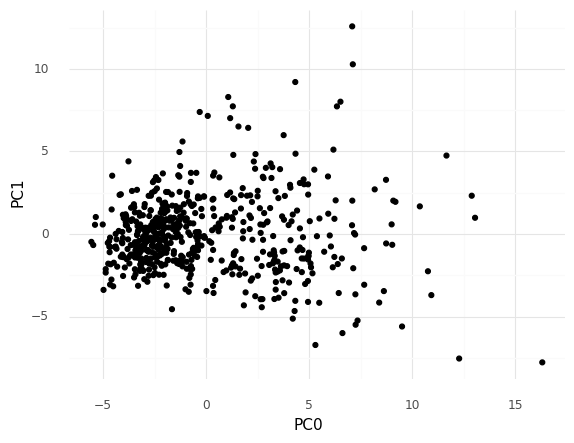

<ggplot: (8792455602929)>

In [66]:
# renaming columns
pcomps4.columns = ["PC" + str(i) for i in range(0,4)]

# plot first two components
(ggplot(pcomps4, aes(x = "PC0", y = "PC1")) + geom_point() + theme_minimal())

### PC Loadings

In [77]:
loadings = pd.DataFrame({"loading": pca.components_.flatten(), "comp": np.repeat(range(1,31), 30,
                                                                    axis=0), "variable":np.tile(features,30)})

loadings.head(30)

# degiskenlerin ne kadarlik kismi o component'in icine dahil edilmis onu gosteriyor
# burada sadece 1'inci component'a ait bilgiler gosterilmis

,loading,comp,variable
0,0.218902,1,radius_mean
1,0.103725,1,texture_mean
2,0.227537,1,perimeter_mean
3,0.220995,1,area_mean
4,0.142590,1,smoothness_mean
5,0.239285,1,compactness_mean
6,0.258400,1,concavity_mean
7,0.260854,1,concave points_mean
8,0.138167,1,symmetry_mean
9,0.064363,1,fractal_dimension_mean


## Another One

In [78]:
liz = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Lizzo_data.csv")
liz.columns

Index(['Unnamed: 0', 'artist_name', 'artist_id', 'album_id', 'album_type',
       'album_release_date', 'album_release_year',
       'album_release_date_precision', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_id', 'analysis_url',
       'time_signature', 'disc_number', 'duration_ms', 'explicit',
       'track_href', 'is_local', 'track_name', 'track_preview_url',
       'track_number', 'type', 'track_uri', 'external_urls.spotify',
       'album_name', 'key_name', 'mode_name', 'key_mode'],
      dtype='object')

In [79]:
features = ['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo']

z = StandardScaler()

liz = liz[features]

liz[features] = z.fit_transform(liz[features])

In [80]:
pca2 = PCA()
pca2.fit(liz)
print(pca2.explained_variance_ratio_)

[0.31926823 0.15601168 0.13444894 0.10646081 0.09352151 0.07231293
 0.05557962 0.03822546 0.02417083]


In [82]:
pcaDF2 = pd.DataFrame({"expl_var" : pca2.explained_variance_ratio_, "pc": range(1,10), 
                       "cum_var": pca2.explained_variance_ratio_.cumsum()})
pcaDF2

,expl_var,pc,cum_var
0,0.319268,1,0.319268
1,0.156012,2,0.475280
2,0.134449,3,0.609729
3,0.106461,4,0.716190
4,0.093522,5,0.809711
5,0.072313,6,0.882024
6,0.055580,7,0.937604
7,0.038225,8,0.975829
8,0.024171,9,1.000000


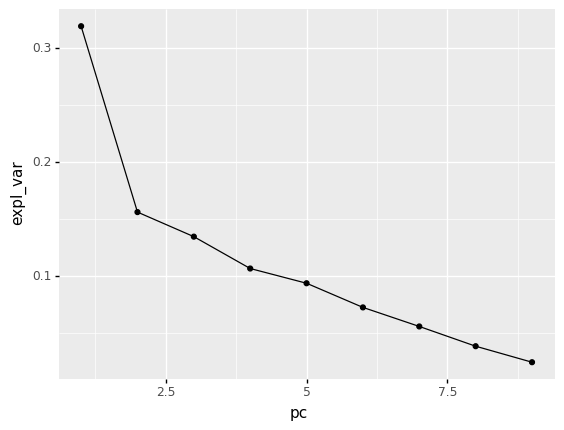

<ggplot: (8792455620861)>

In [83]:
ggplot(pcaDF2, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point()

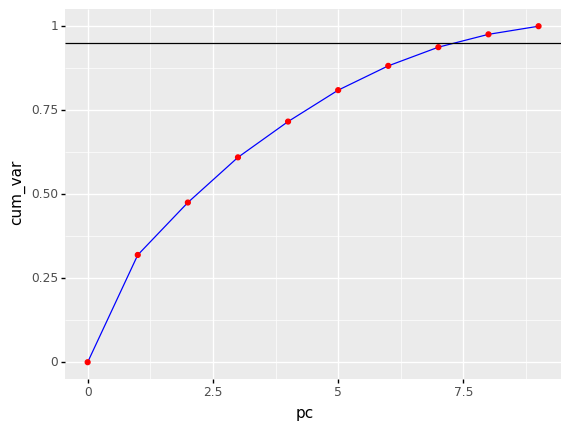

<ggplot: (8792455873765)>

In [85]:
pcaDF2 = pcaDF2.append({'expl_var':0, 'pc':0, 'cum_var':0}, ignore_index=True)
(ggplot(pcaDF2, aes(x = "pc", y = "cum_var")) + geom_line(color = "blue") +
 geom_point(color = "red") + geom_hline(yintercept = 0.95))